# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions
1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.
- We will start importing our data, cleaning the header and checking the head

In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [6]:
# load dataset into a pandas dataframe
df = pd.read_csv("C:/Users/digit/Desktop/Ironhack_Labs/Week4/D5/lab-random-variable-distributions/data/we_fn_use_c_marketing_customer_value_analysis.csv")
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# turn the column names into lower case
df.columns = df.columns.str.lower()
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace(" ","_")
df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

## Get the numerical variables of the dataset

In [13]:
df_nums = df.select_dtypes(include=np.number)
df_nums

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


- Now we can visualize the distributions of the data 

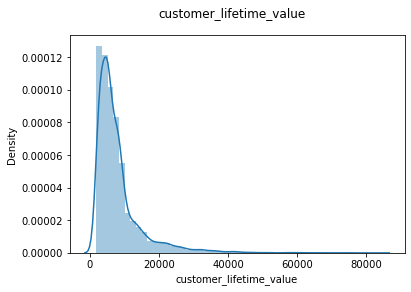

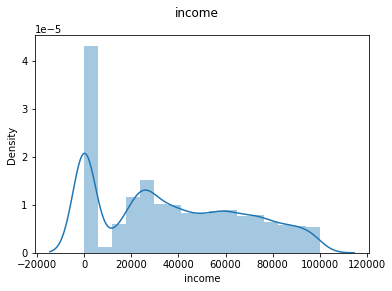

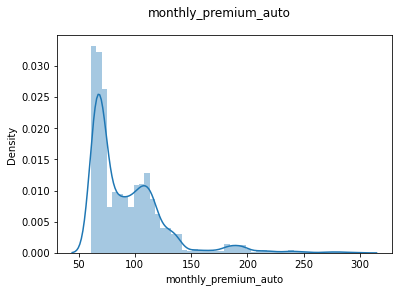

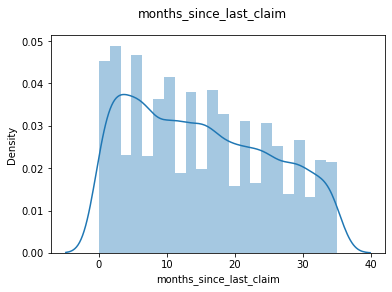

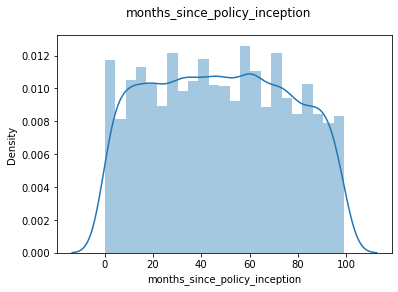

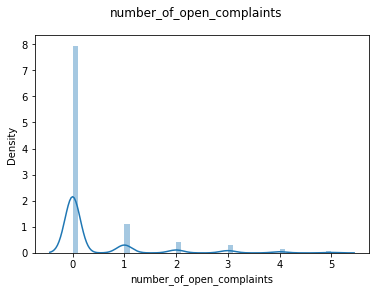

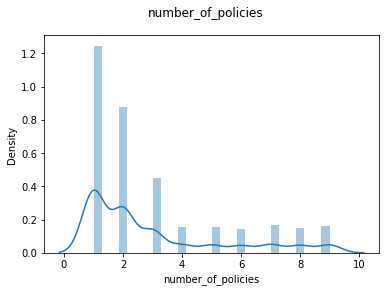

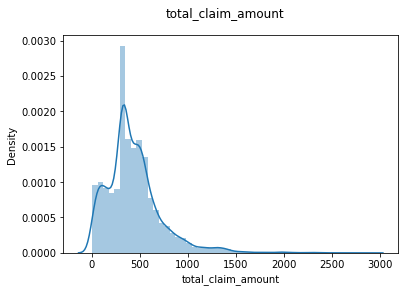

In [15]:
for col in df_nums:
    sns.distplot(df_nums[col])
    plt.suptitle(col)
    plt.show()

- Now we write the function to rescale with the log method as several columns are skewed to the right

In [16]:
# function to rescale with log method 
def log_transfom_clean_(x):
    x = np.log(x)
    if np.isfinite(x):
        return x
    else:
        return np.NAN # (we can replace the NANs with mean values in the next step)

- After that we write another function that transforms the columns ,and plots it before and after appyling the scaler

In [18]:
def map_column_log_nan(data, col,disp = True):
    # We show the data before
    if disp == True:
        sns.distplot(data[col])
        plt.suptitle(col+" before log normalization")
        plt.show()
    
    temp = list(map(log_transfom_clean_, data[col]))
    temp = pd.Series(temp).fillna(np.mean(temp))
    
    # and after
    if disp == True:
        sns.distplot(temp)
        plt.suptitle(col+" after log normalization")
        plt.show()
    
    return temp

- Now we can apply it to columns to give a more normal distributiuons. The function will display the changes and return the series, so if we like the result, we can use it to overwrite it, without plotting if we pass disp=False.
- some of the columns have a lot of outliers. We can remove those first, before normalization:

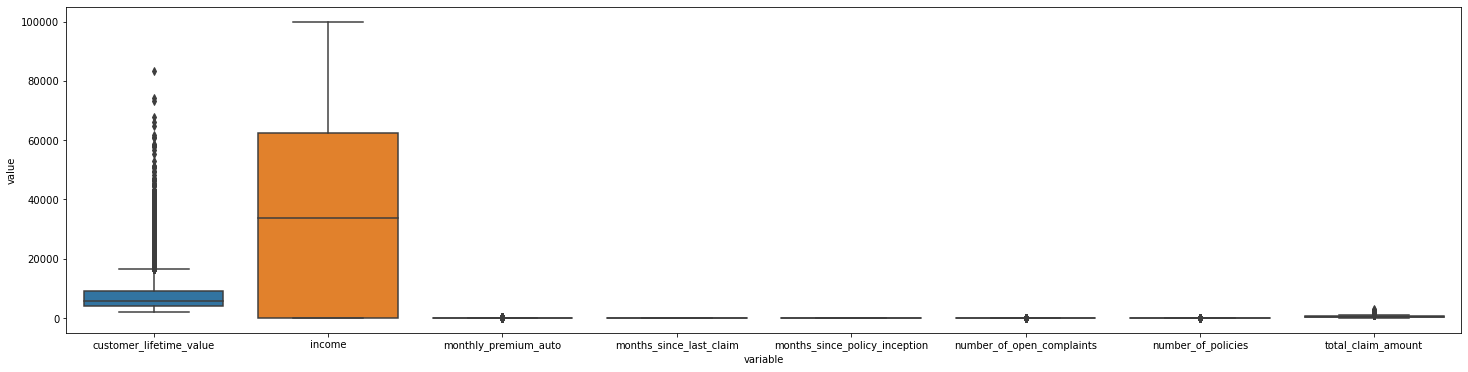

In [23]:
plt.figure(figsize=(25,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df_nums.select_dtypes(include=np.number)));

- Define the function that will remove outliers from the data

In [24]:
def clean_outliers(data,col):
    """
    Will input the column name as data['Column'], will return the dataframe modified, 
    with all data outside 1.5x the interquartile distance from the median. 
    """
    iqr = np.percentile(data[col],75) - np.percentile(data[col],25)
    upper_limit = np.percentile(data[col],75) + 1.5*iqr
    lower_limit = np.percentile(data[col],25) - 1.5*iqr

    return data[(data[col]>lower_limit) & (data[col]<upper_limit)]

- Let's proceed with the cleaning

In [25]:
df_nums = clean_outliers(df_nums, "customer_lifetime_value")

In [26]:
df_nums = clean_outliers(df_nums, "total_claim_amount")

In [27]:
df_nums = clean_outliers(df_nums, "monthly_premium_auto")

- Now let's visualize the result

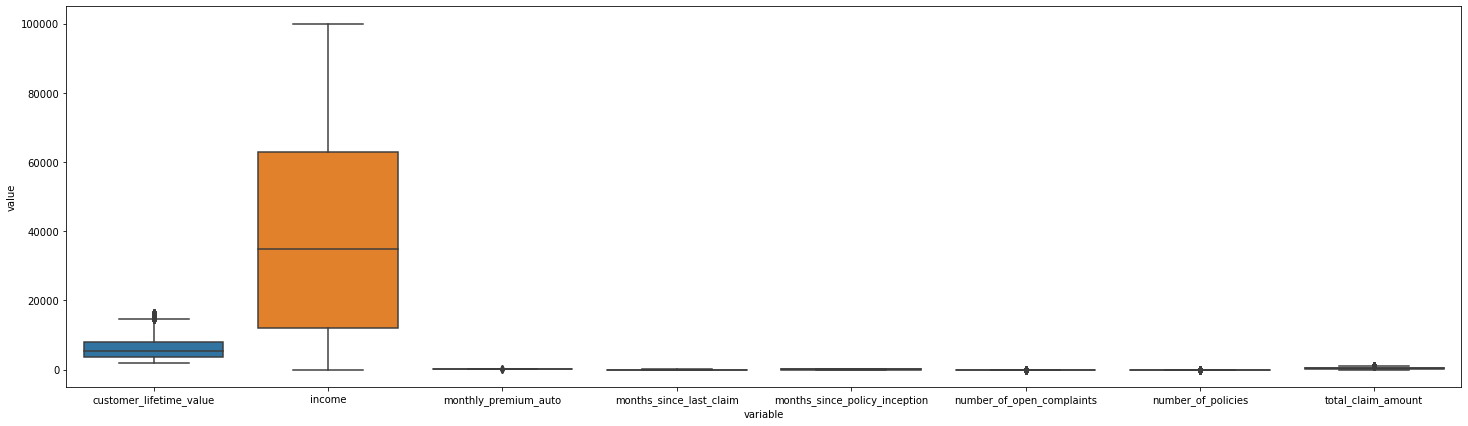

In [30]:
plt.figure(figsize=(25,7))
sns.boxplot(x="variable", y="value", data=pd.melt(df_nums));

## Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

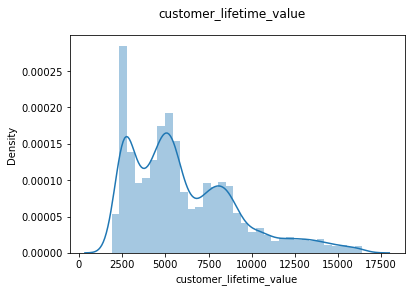

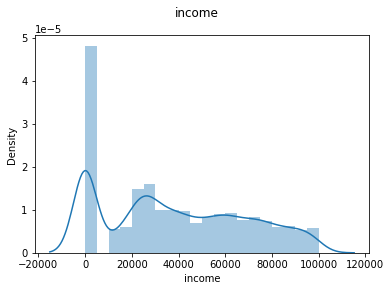

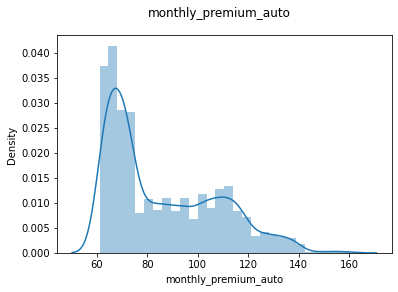

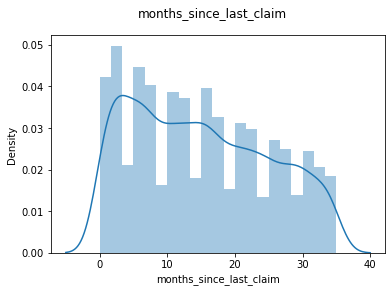

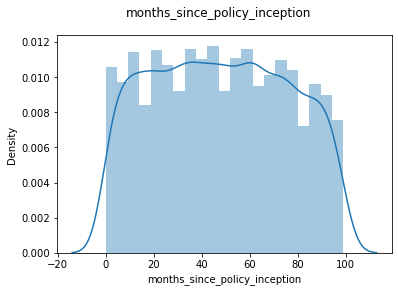

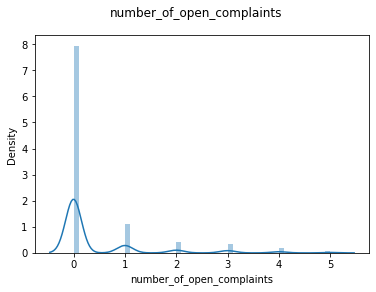

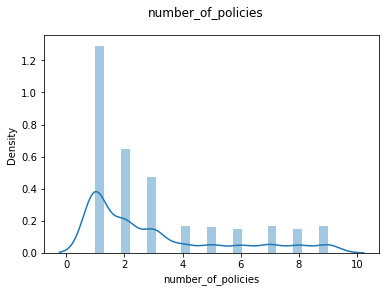

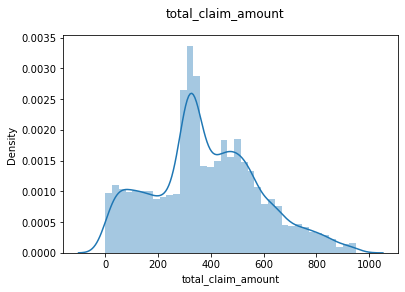

In [31]:
for col in df_nums.columns:
    
    sns.distplot(df_nums[col])
    plt.suptitle(col)
    plt.show()

- We will leave number of open complaints, and number of policies as they are, as they seem more like categorical columns to me. Maybe when preprocessing for a model we can encode those into several categories. For the rest let's apply logarithmic normalization in the scale with the function we worked with before.
- Months_since_policy_inception looks normalized, even though we could say the distribution is very uniform.

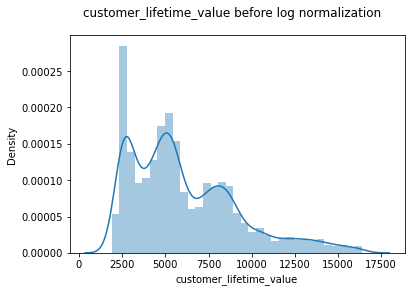

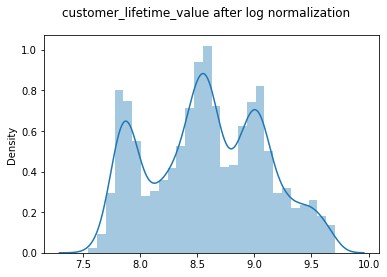

0       7.924260
1       9.464008
2       8.941920
3       7.942253
4       9.018732
          ...   
7812    8.318839
7813    8.038031
7814    9.007476
7815    8.925912
7816    7.867809
Length: 7817, dtype: float64

In [32]:
map_column_log_nan(df_nums,'customer_lifetime_value')

In [33]:
# The result looks good, so now we can assign it:
df_nums['customer_lifetime_value'] = map_column_log_nan(df_nums,'customer_lifetime_value', disp = False)

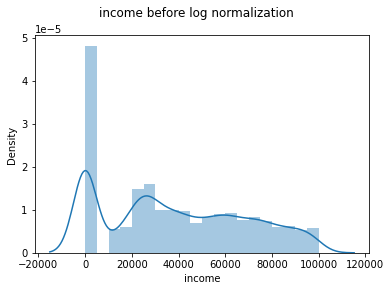

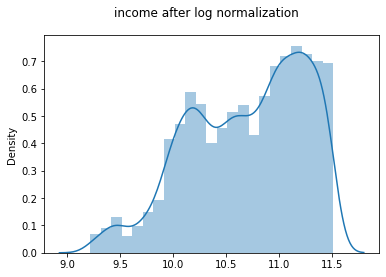

0       10.937988
1       10.794809
2             NaN
3       10.688211
4       11.049333
          ...    
7812    10.773965
7813     9.980634
7814          NaN
7815     9.996112
7816          NaN
Length: 7817, dtype: float64

In [34]:
map_column_log_nan(df_nums,'income')

In [35]:
# We will keep this one too 
df_nums['income'] = map_column_log_nan(df_nums,'income', disp = False)

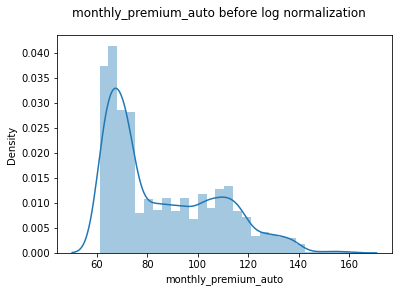

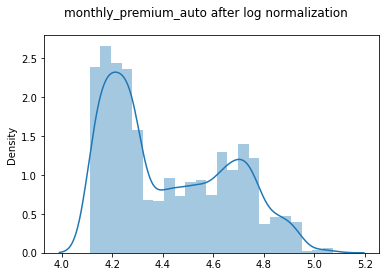

0       4.234107
1       4.682131
2       4.663439
3       4.290459
4       4.234107
          ...   
7812    4.644391
7813    4.369448
7814    4.442651
7815    4.564348
7816    4.343805
Length: 7817, dtype: float64

In [36]:
map_column_log_nan(df_nums,'monthly_premium_auto')

In [37]:
# same here
df_nums['monthly_premium_auto'] = map_column_log_nan(df_nums,'monthly_premium_auto', disp = False)

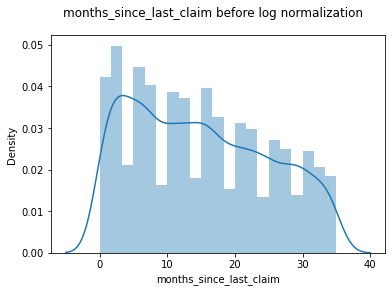

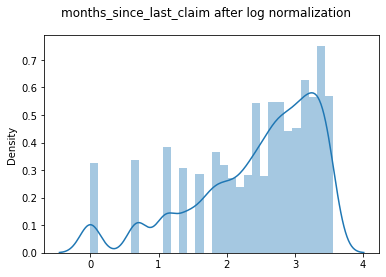

0       3.465736
1       2.890372
2       2.890372
3       2.484907
4       2.639057
          ...   
7812    2.772589
7813    2.639057
7814    2.197225
7815    3.526361
7816    1.098612
Length: 7817, dtype: float64

In [38]:
map_column_log_nan(df_nums,'months_since_last_claim')

In [39]:
df_nums['months_since_last_claim'] = map_column_log_nan(df_nums,'months_since_last_claim', disp = False)

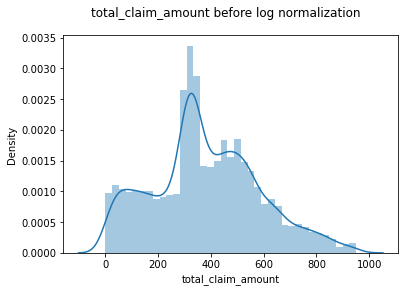

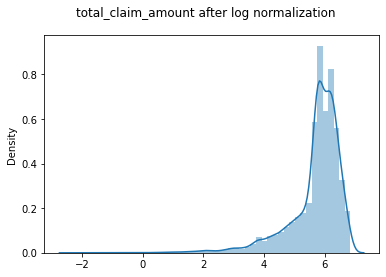

0       5.952753
1       6.339428
2       6.272653
3       4.928202
4       5.071310
          ...   
7812    6.293940
7813    5.938064
7814    6.673026
7815    6.538429
7816    5.912421
Length: 7817, dtype: float64

In [41]:
map_column_log_nan(df_nums,'total_claim_amount')

In [42]:
df_nums['total_claim_amount'] = map_column_log_nan(df_nums,'total_claim_amount', disp = False)

## Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

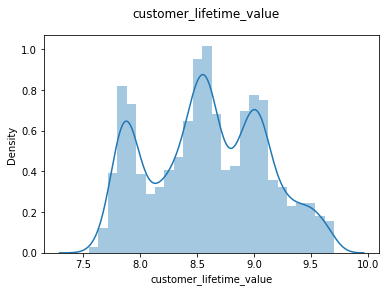

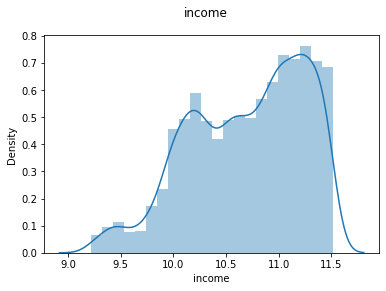

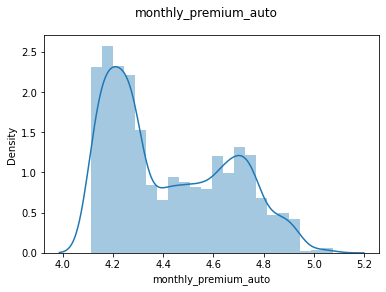

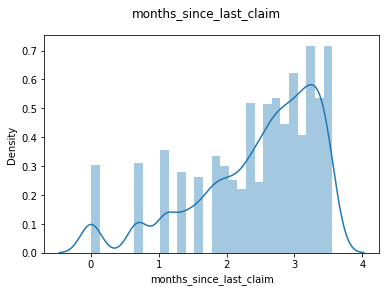

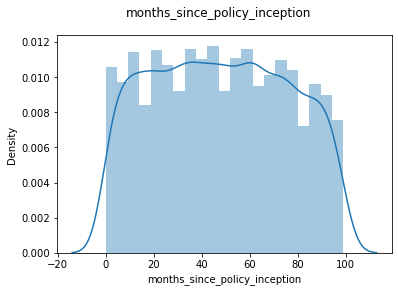

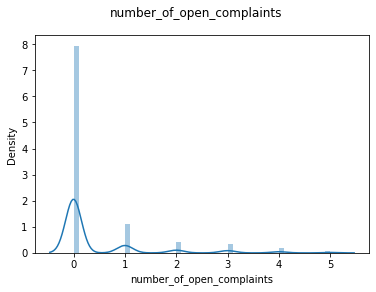

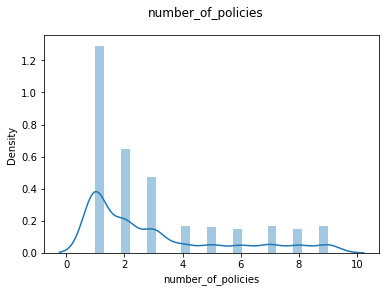

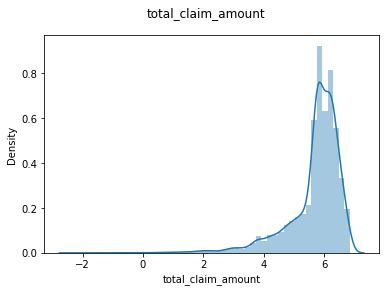

In [43]:
for col in df_nums.columns:
    
    sns.distplot(df_nums[col])
    plt.suptitle(col)
    plt.show()